In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 150
BATCH_SIZE = 32
CHANELS = 3
EPOCHS = 50

## Extract dataset objects from the "train" and "test" folders.

Number of elements in the "dataset" object is:<br>
num_elements = num_images_in_total / BATCH_SIZE (e.g.14034/32 = 439.x)<br>

Each element in the "dataset" object is a tupple of 2 elements:<br>
(batch_images, batch_labels)<br>
where:<br>
"batch_images" is a tf.Tensor of size: [BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3](e.g. 32 x 150 x 150 x 3)<br>
"batch_labels" is a tf.Tensor of size: [BATCH_SIZE] (e.g. 32 labels value from 0 to 5, since we have 6 categories)

In [3]:
data_train = tf.keras.preprocessing.image_dataset_from_directory(
    'data/train',
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names = data_train.class_names

Found 14034 files belonging to 6 classes.


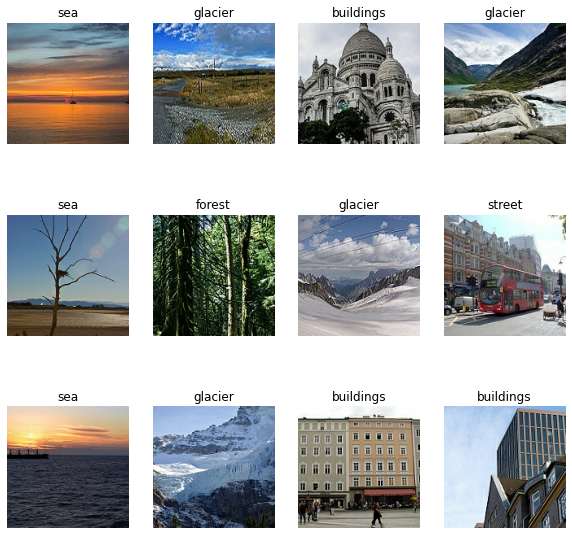

In [4]:
# print out some sample train pictures
plt.figure(figsize=(10,10))
for image_batch, label_batch in data_train.take(1): # Thus, data_take(x) means to take x batches, with 32 images in each batch
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('int'))
        plt.title(class_names[label_batch[i]]) # data_train.class_names is a list of all the labels
        plt.axis('off')

In [5]:
data_val_test = tf.keras.preprocessing.image_dataset_from_directory(
    'data/test',
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3000 files belonging to 6 classes.


In [6]:
# devide the data_val_test into data__val and data_test
val_ratio = 0.5
val_size = int(len(data_val_test) * val_ratio)
data_val = data_val_test.take(val_size)
data_test = data_val_test.skip(val_size)

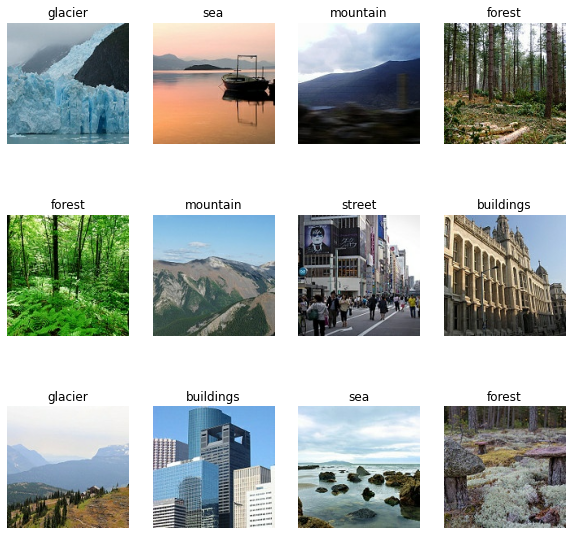

In [7]:
# Print out some sample val pictures
plt.figure(figsize=(10,10))
for image_batch, label_batch in data_val.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('int'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

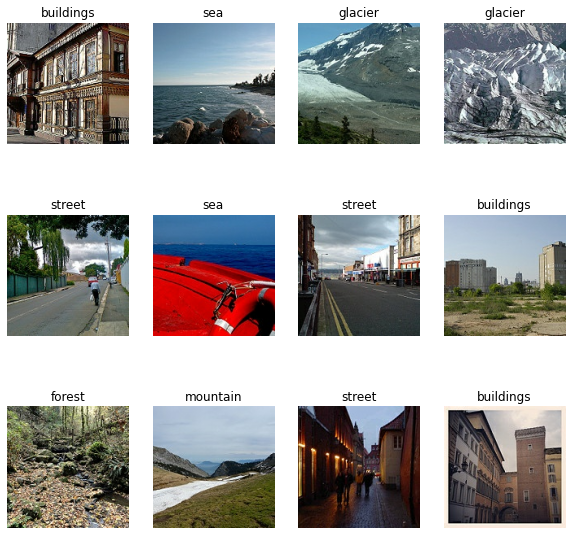

In [8]:
# Print out some sample test pictures
plt.figure(figsize=(10,10))
for image_batch, label_batch in data_test.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('int'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [9]:
# do cache and prefetch to improve performance
data_train = data_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
data_val = data_val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
data_test = data_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
# resize and rescale the pixel values
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(scale=1./255)
])

## Train the data_train set

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANELS)
n_classes = 6

model = tf.keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax') 
])

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)      

In [12]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
train_val = model.fit(
    data_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = data_val
)

Epoch 1/50
439/439 [==============================] - 21s 14ms/step - loss: 1.1905 - accuracy: 0.5755 - val_loss: 0.8776 - val_accuracy: 0.6729
Epoch 2/50
439/439 [==============================] - 6s 13ms/step - loss: 0.7551 - accuracy: 0.7142 - val_loss: 0.6907 - val_accuracy: 0.7580
Epoch 3/50
439/439 [==============================] - 6s 13ms/step - loss: 0.6352 - accuracy: 0.7674 - val_loss: 0.6355 - val_accuracy: 0.7773
Epoch 4/50
439/439 [==============================] - 6s 13ms/step - loss: 0.5474 - accuracy: 0.8050 - val_loss: 0.5946 - val_accuracy: 0.7839
Epoch 5/50
439/439 [==============================] - 6s 13ms/step - loss: 0.4846 - accuracy: 0.8264 - val_loss: 0.6177 - val_accuracy: 0.7513
Epoch 6/50
439/439 [==============================] - 6s 13ms/step - loss: 0.4292 - accuracy: 0.8492 - val_loss: 0.5923 - val_accuracy: 0.7985
Epoch 7/50
439/439 [==============================] - 6s 13ms/step - loss: 0.3964 - accuracy: 0.8600 - val_loss: 0.7029 - val_accuracy: 0.792

Text(0.5, 1.0, 'Loss Curve')

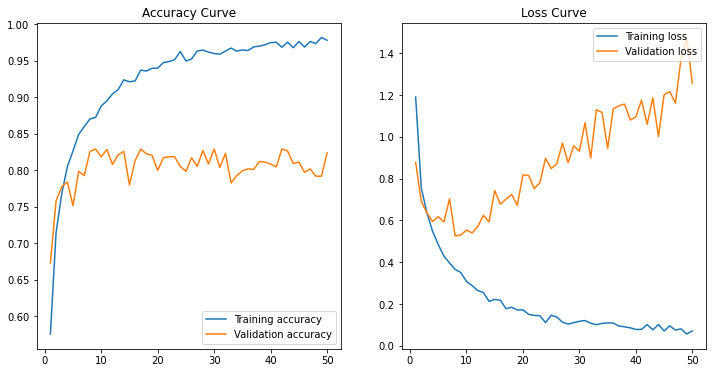

In [14]:
# plot the learning curve
train_acc = train_val.history['accuracy']
val_acc = train_val.history['val_accuracy']
train_loss = train_val.history['loss']
val_loss = train_val.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(1,EPOCHS+1),train_acc, label='Training accuracy')
plt.plot(range(1,EPOCHS+1),val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Curve')
plt.subplot(1,2,2)
plt.plot(range(1,EPOCHS+1),train_loss, label='Training loss')
plt.plot(range(1,EPOCHS+1),val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Loss Curve')

## Run data_test

In [15]:
scores = model.evaluate(data_test)

47/47 [==============================] - 2s 13ms/step - loss: 1.1632 - accuracy: 0.8128


## Save model

In [16]:
model.save('Intel_image_classification_v1.h5')